In [1]:
import pandas as pd

data = pd.read_csv("train_data_50_main.csv")

data['Date'] = pd.to_datetime(data['Date'])

# set indexes 
data.set_index(["Ticker", "Date"], inplace=True)

data

Open       High        Low      Close  Adj Close  \
Ticker Date                                                                
ZJ     2015-07-06   5.699535   5.758382   5.695429   5.747890   5.193889   
       2015-07-07   5.742872   5.754733   5.646161   5.733748   5.181111   
       2015-07-08   5.678550   5.685849   5.590051   5.591420   5.052501   
       2015-07-09   5.649811   5.659391   5.438599   5.477374   4.949447   
       2015-07-10   5.562680   5.649811   5.529379   5.623808   5.081768   
...                      ...        ...        ...        ...        ...   
ZA     2021-04-05  10.455685  10.459335  10.244017  10.309707   9.270878   
       2021-04-06  10.371748  10.499479  10.265913  10.280512   9.244624   
       2021-04-07  10.289635  10.358975  10.262265  10.326130   9.285647   
       2021-04-08  10.205698  10.233069  10.094389  10.218471   9.188834   
       2021-04-09  10.218471  10.298759  10.132709  10.194749   9.167504   

                      Volume  
Ticker Date                   
ZJ     2015-07-06  112241600  
       2015-07-07  187787200  
       2015-07-08  243046400  
       2015-07-09  314380000  
       2015-07-10  245418000  
...                      ...  
ZA     2021-04-05   23264800  
       2021-04-06   18926300  
       2021-04-07   22385000  
       2021-04-08   21999300  
       2021-04-09   20020700  

[72600 rows x 6 columns]

In [2]:

major_indices = ['^SOX', '^DJI', '^DJT', '^DJU','^SPX', '^MID','^SML', '^SP1500', '^NBI', '^XAU', '^OSX', '^VIX']

print(major_indices)



['^SOX', '^DJI', '^DJT', '^DJU', '^SPX', '^MID', '^SML', '^SP1500', '^NBI', '^XAU', '^OSX', '^VIX']


In [3]:
import yfinance as yf
from datetime import datetime

index_tickers = ['DJIA', 'DJT', 'DJU', 'NDX', 'COMP', 'NYA', 'SPX', 'MID', 'OEX', 'IXCO', 'SOX', 'XAU', 'XOI', 'RUT']
start_date = "2015-07-06"  # Example start date
end_date = "2021-04-09"  # Example end date


all_indices = pd.DataFrame()

for index in major_indices:
    def get_stock_data(symbol, start_date, end_date):
        ticker = yf.Ticker(symbol)
        data = ticker.history(start=start_date, end=end_date)
        return data

    # Example usage
    stock_data = get_stock_data(index, start_date, end_date)

    stock_data = stock_data.reset_index(drop=False)

    stock_data['Date'] = pd.to_datetime(stock_data['Date']).dt.date

    df_with_ticker = pd.DataFrame({'Ticker': [index] * len(stock_data)})  # Creating a DataFrame with the ticker column

    # Concatenating the two DataFrames
    stock_data = pd.concat([df_with_ticker, stock_data], axis=1)
    all_indices = pd.concat([all_indices, stock_data], axis=0)



^SML: No timezone found, symbol may be delisted


In [6]:
all_indices
all_indices.set_index(["Ticker", "Date"], inplace=True)


In [7]:
hidden_tickers = data.index.get_level_values("Ticker").unique()
print(len(hidden_tickers))

spx_tickers =  all_indices.index.get_level_values("Ticker").unique()
print(len(spx_tickers))

correlations = []


for ticker1 in hidden_tickers:
    for ticker2 in spx_tickers:
        # Ensure that both tickers are present in their respective DataFrames
        if ticker1 in data.index and ticker2 in all_indices.index:
            # Calculating the correlation for the chosen tickers
            correlation = data.loc[ticker1]['Close'].corr(all_indices.loc[ticker2]['Close'])
            correlations.append({'Ticker1': ticker1, 'Ticker2': ticker2, 'Correlation': correlation})

        else:
            print("Tickers not found in the DataFrames.")

correlation_df = pd.DataFrame(correlations)
sorted_correlation_df = correlation_df.sort_values(by='Correlation', ascending=False)


50
11


In [8]:
print(sorted_correlation_df.head(100))


    Ticker1  Ticker2  Correlation
490      ZO  ^SP1500     0.986355
488      ZO     ^SPX     0.986226
198       P     ^SOX     0.986155
209       J     ^SOX     0.985954
37        V     ^SPX     0.984610
..      ...      ...          ...
358      ZP  ^SP1500     0.914690
341       G     ^SOX     0.913933
59       ZG     ^SPX     0.911369
231      ZB     ^SOX     0.911162
70        R     ^SPX     0.909711

[100 rows x 3 columns]


In [9]:
top_correlated_indices = sorted_correlation_df.iloc[:6]

top_correlated_indices


,Ticker1,Ticker2,Correlation
490,ZO,^SP1500,0.986355
488,ZO,^SPX,0.986226
198,P,^SOX,0.986155
209,J,^SOX,0.985954
37,V,^SPX,0.984610
39,V,^SP1500,0.979731


In [10]:
least_correlated_indices = sorted_correlation_df.iloc[-6:]

least_correlated_indices


,Ticker1,Ticker2,Correlation
515,Y,^OSX,-0.906288
416,W,^OSX,-0.907241
328,ZW,^OSX,-0.907830
537,T,^OSX,-0.912266
152,X,^OSX,-0.914520
339,I,^OSX,-0.915118


In [11]:
import matplotlib.pyplot as plt

def plot_prices_and_returns(data1, data2, ticker1, ticker2):
    plt.figure(figsize=(14,6))

    # plotting closing prices
    plt.subplot(1, 2, 1)
    plt.plot(data1.index, data1['Close'], label=ticker1)
    plt.plot(data2.index, data2['Close'], label=ticker2)
    plt.title(f"Closing Prices of {ticker1} and {ticker2}")
    plt.xlabel("Date")
    plt.ylabel("Closing Price")
    plt.legend()
    
    # plotting daily returns
    plt.subplot(1, 2, 2)
    plt.plot(data1.index, data1['Close'].pct_change(), label=ticker1)
    plt.plot(data2.index, data2['Close'].pct_change(), label=ticker2)
    plt.title(f"Daily Returns of {ticker1} and {ticker2}")
    plt.xlabel("Date")
    plt.ylabel("Daily Return")
    plt.legend()
    
    plt.tight_layout()
    plt.show()

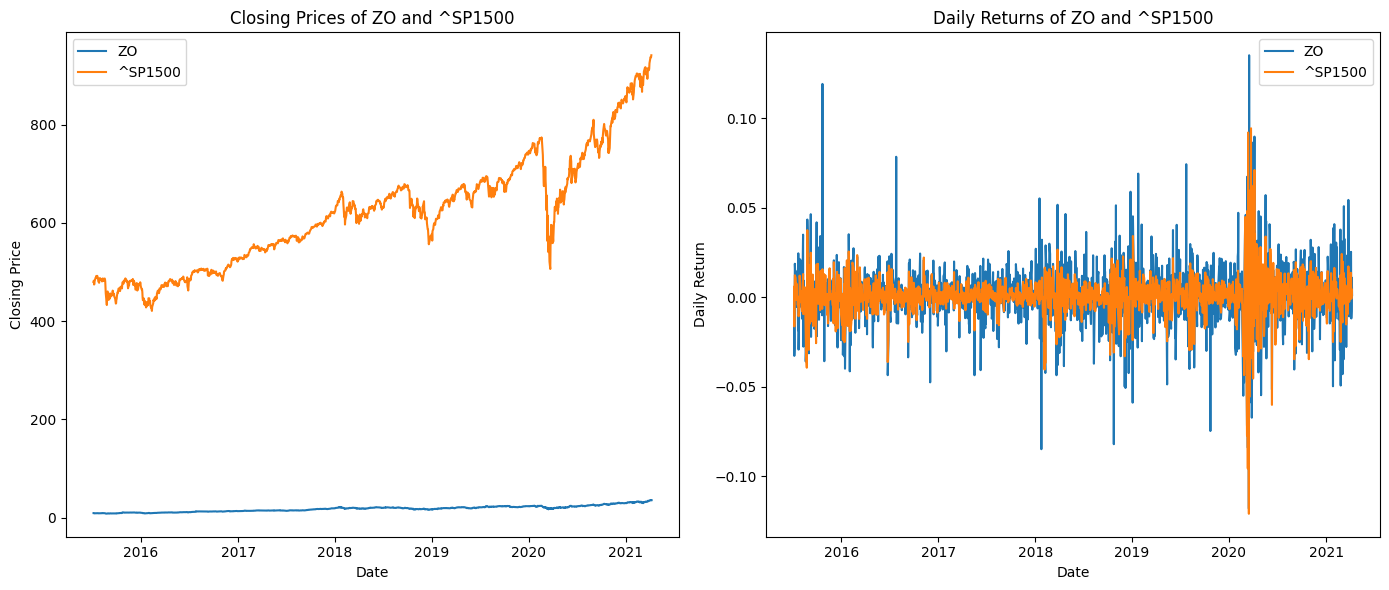

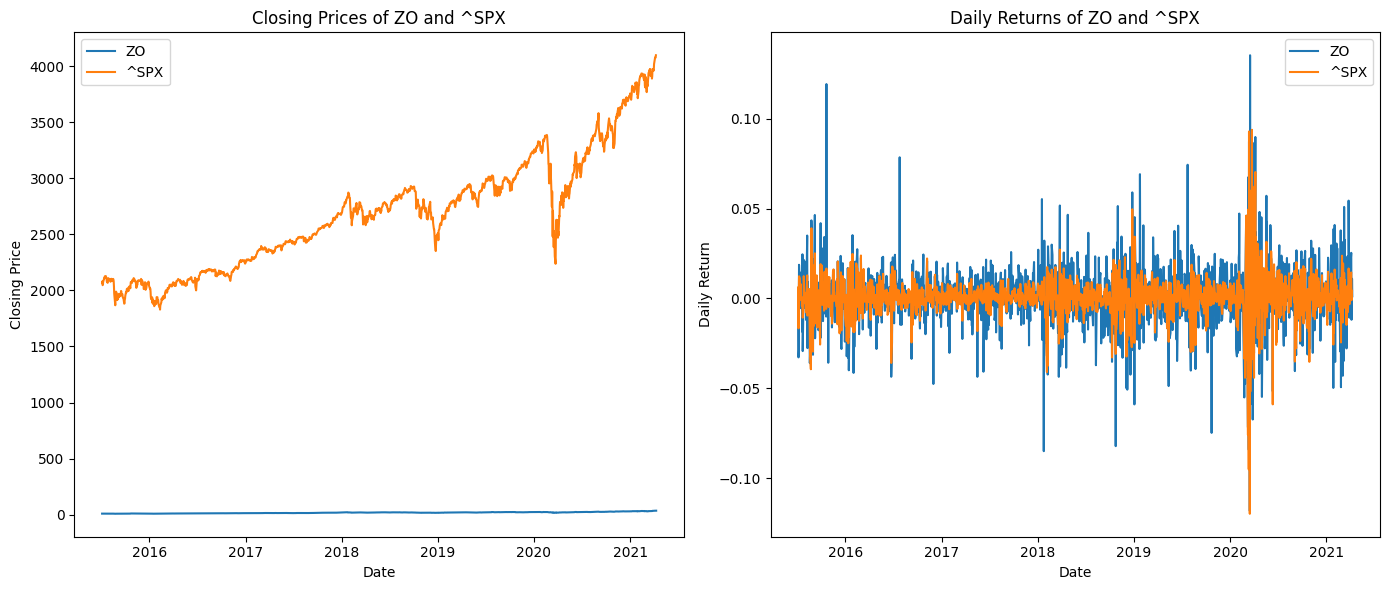

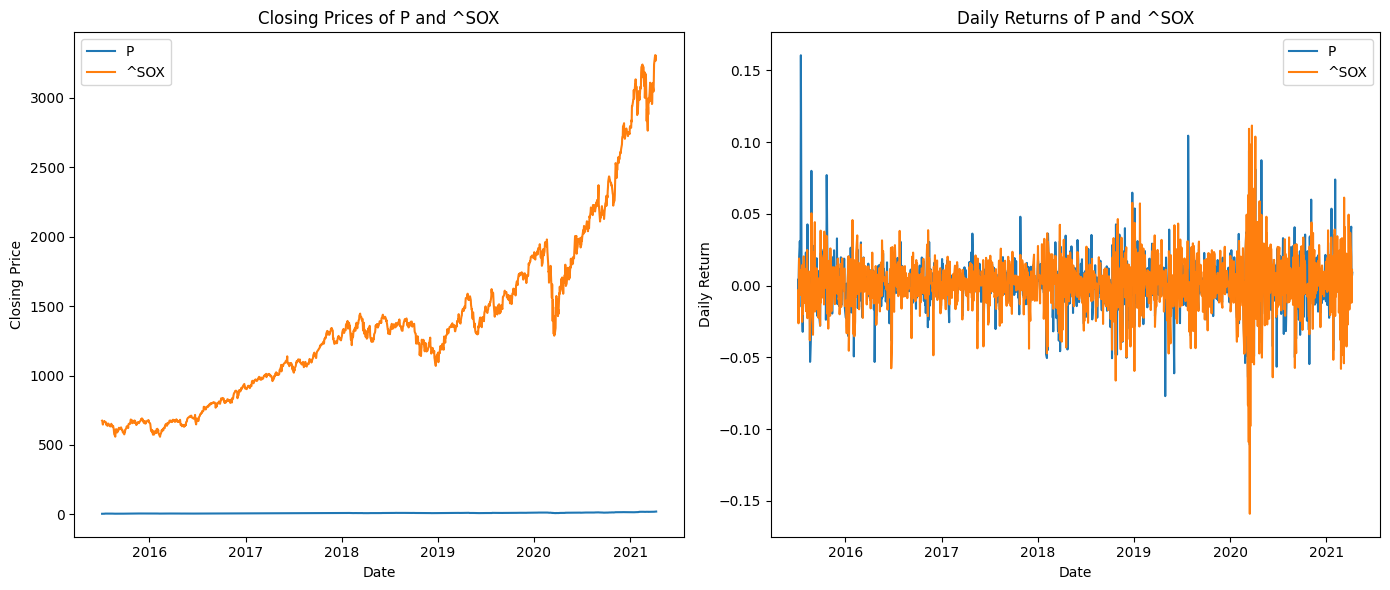

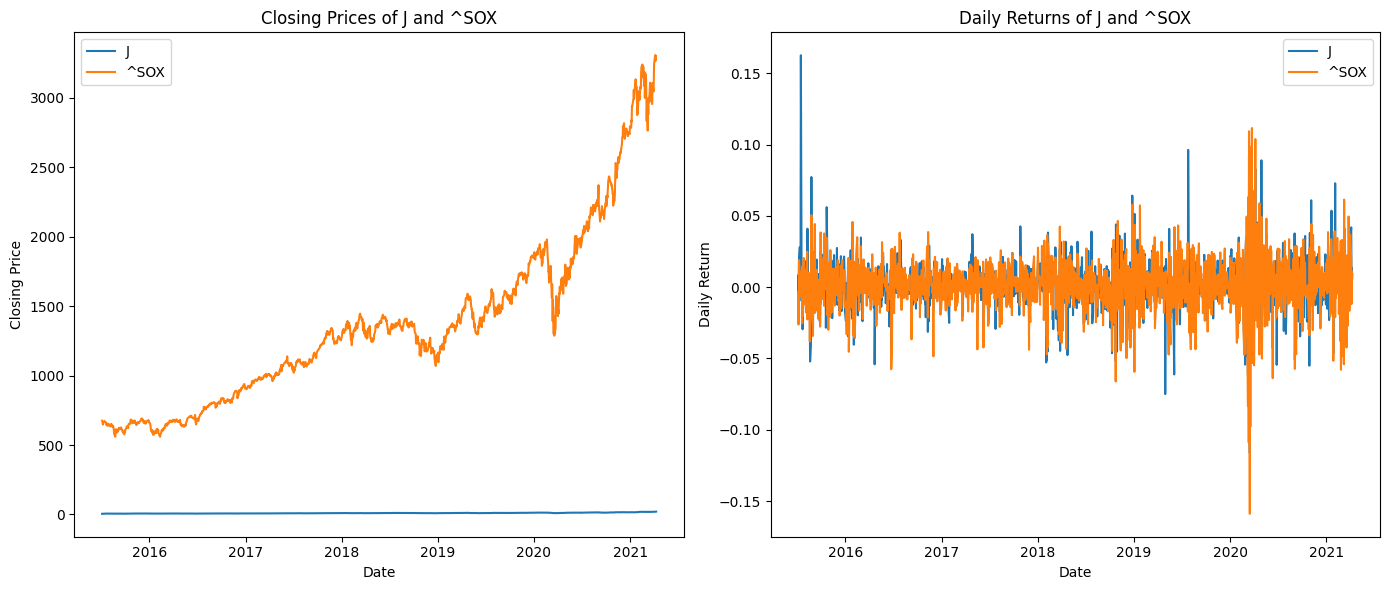

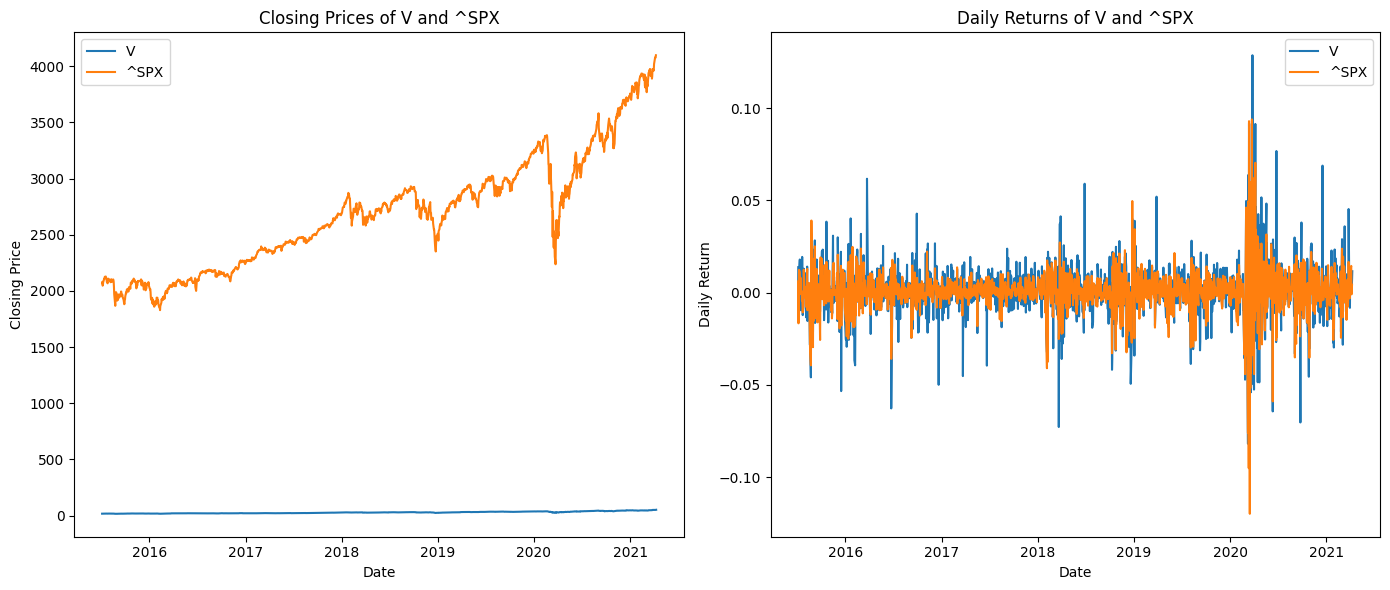

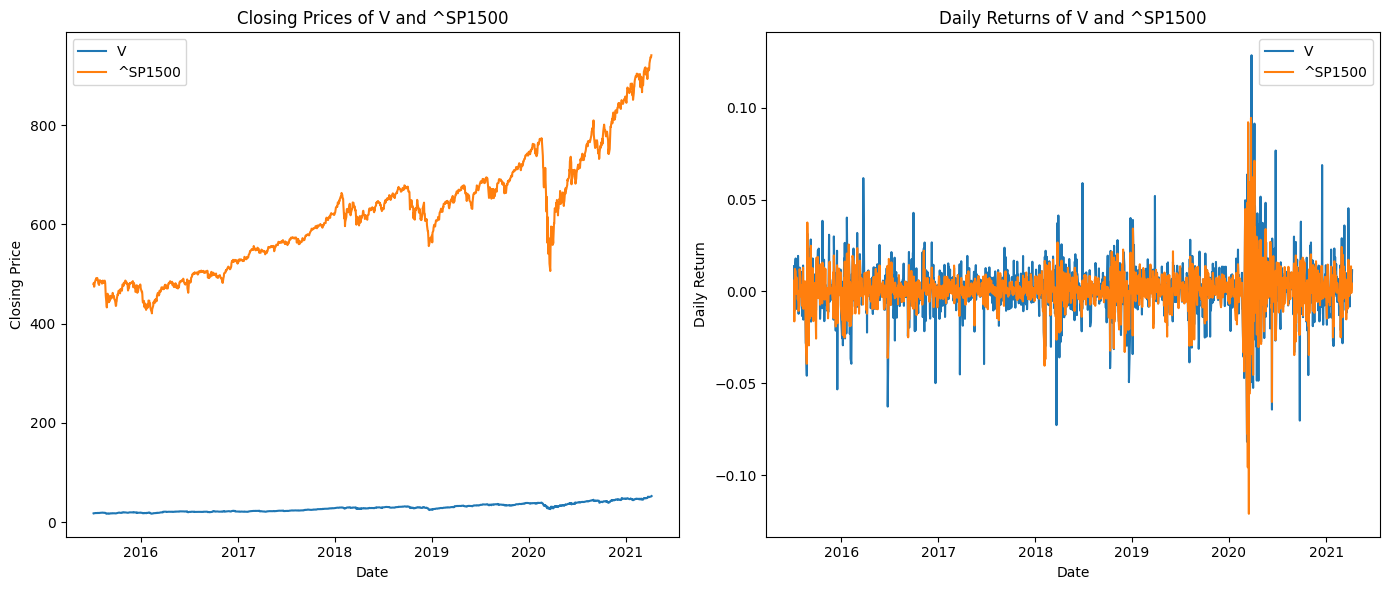

In [12]:
# top correlated pairs
for index, row in top_correlated_indices.iterrows():
    ticker1 = row['Ticker1']
    ticker2 = row['Ticker2']
    data1 = data.loc[ticker1]
    if ticker2 in major_indices:
        data2 = all_indices.loc[ticker2]
    else:
        data2 = data.loc[ticker2]
    plot_prices_and_returns(data1, data2, ticker1, ticker2)